# Using Series with Pandas

In [3]:
# Import numpy and pandas
import numpy as np
import pandas as pd;

In [4]:
#creating a series from a list
sports = ['golf', 'football', 'darts']
s = pd.Series(sports)
s

0        golf
1    football
2       darts
dtype: object

In [5]:
#creating a series from a dictionary
sports2 = {'Achery':'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s2 = pd.Series(sports2)
s2

Achery            Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [6]:
# Query by index three ways..
s[1] == s.iloc[1]
s[1]

'football'

In [7]:
# option 1 - use the index order
s2[3]

'South Korea'

In [8]:
# option 2 - use the index label via loc
s2.loc['Taekwondo']

'South Korea'

In [9]:
# option 3 - use the index position via iloc
s2.iloc[3]

'South Korea'

# Common Series Tasks

In [10]:
#create a series of 10,000 random intergers ranging in value between 0-819
s = pd.Series(np.random.randint(0,819,10000))
s.head(10)

0    539
1    732
2     98
3    669
4     32
5    187
6    268
7    774
8    809
9    393
dtype: int32

In [11]:
#check length of s
len(s)

10000

magic function begin with a % or %% sign . type in % and tab to view of fuctions.
testing two different python methods of sum:

In [12]:
%%timeit -n 100
summary = 0
for item in s:
    summary+= item

100 loops, best of 3: 1.33 ms per loop


In [13]:
%%timeit -n 100
summary2 = np.sum(s)

100 loops, best of 3: 217 µs per loop


In [30]:
#adding 2 to every number in series
s += 2
s.head(10)

0    634
1    456
2    703
3    508
4    337
5    501
6    700
7     22
8    693
9    443
dtype: int32

In [14]:
# multiplying 2 to every number in series
s *= 2
s.head(10)

0    1078
1    1464
2     196
3    1338
4      64
5     374
6     536
7    1548
8    1618
9     786
dtype: int32

# Dataframes

In [15]:
#creating a dataframe

purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})

df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [16]:
#querying a dataframe
df['Item Purchased']

Store 1        Dog Food
Store 1    Kitty Litter
Store 2       Bird Seed
Name: Item Purchased, dtype: object

In [17]:
df.iloc[2]

Cost                      5
Item Purchased    Bird Seed
Name                  Vinod
Name: Store 2, dtype: object

In [18]:
df.iloc[0]["Name"]

'Chris'

In [19]:
df.loc['Store 1']

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn


In [20]:
df.loc['Store 1','Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [21]:
#Transposing data frames..
df.T

,Store 1,Store 1,Store 2
Cost,22.5,2.5,5
Item Purchased,Dog Food,Kitty Litter,Bird Seed
Name,Chris,Kevyn,Vinod


In [22]:
df['Name']

Store 1    Chris
Store 1    Kevyn
Store 2    Vinod
Name: Name, dtype: object

In [23]:
#dropping data is only by view unless assigning a new object or using the del function
df.drop('Store 1')

,Cost,Item Purchased,Name
Store 2,5.0,Bird Seed,Vinod


In [52]:
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [24]:
df_copy = df.copy()
df_copy = df_copy.drop('Store 1')
df_copy

,Cost,Item Purchased,Name
Store 2,5.0,Bird Seed,Vinod


In [25]:
del df_copy['Name']
df_copy

,Cost,Item Purchased
Store 2,5.0,Bird Seed


In [26]:
# adding a new column with a default value
df ['Location'] = None
df

,Cost,Item Purchased,Name,Location
Store 1,22.5,Dog Food,Chris,None
Store 1,2.5,Kitty Litter,Kevyn,None
Store 2,5.0,Bird Seed,Vinod,None


In [27]:
#updating all costs by applying 20% discount
df['Cost'] *= 0.8
df

,Cost,Item Purchased,Name,Location
Store 1,18.0,Dog Food,Chris,None
Store 1,2.0,Kitty Litter,Kevyn,None
Store 2,4.0,Bird Seed,Vinod,None


In [29]:
#finding a specific string in a specific column and only returning matching results
df[df['Item Purchased'].str.contains('Food')]

,Cost,Item Purchased,Name,Location
Store 1,18.0,Dog Food,Chris,None


In [31]:
#Only displaying index and sected columns
df[['Item Purchased','Cost']]

,Item Purchased,Cost
Store 1,Dog Food,18.0
Store 1,Kitty Litter,2.0
Store 2,Bird Seed,4.0


# Week 2 Assignment

In [127]:
import pandas as pd
path = r'C:\Users\Katie\Documents\Python Scripts\olympics.csv'
df = pd.read_csv(path, index_col = 0, encoding = 'latin1', skiprows = 0)
df.head()

,#summer,gold,silver,bronze,Total,#winter,gold.1,silver.1,bronze.1,Total.1,#games,gold.2,silver.2,bronze.2,Total.2
Afghanistan,14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
Algeria,13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
Argentina,24,21,25,28,74,18,0,0,0,0,42,21,25,28,74
Armenia,6,2,5,7,14,6,0,0,0,0,12,2,5,7,14
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [128]:
# Question 1 - Which country has won the most gold medals in summer games?
def answer_one():
    df['country'] = df.index
    max_g_country = df.where(df['gold']== df['gold'].max())
    ans_line = max_g_country.dropna()
    return ans_line.iloc[0]['country']

answer_one()

'United States'

In [131]:
# Question 2 - which country had the biggest difference between their summer and winter gold medal counts?
def answer_two():
    df['difference'] = abs(df['gold'] - df['gold.1'])
    biggest_diff_country = df.where(df['difference'] == df['difference'].max())
    return biggest_diff_country.dropna()['country'][0]
answer_two()

'United States'

In [167]:
def answer_three():
    df['difference ratio'] = df['difference']/df['gold.2']
    a = df[(df['gold'] > 0) & (df['gold.1'] > 0)]
    biggest_diff_r = a.where(a['difference ratio'] == a['difference ratio'].max())
    return biggest_diff_r.dropna()['country'][0]

answer_three()
    

'Bulgaria'

In [171]:
def answer_four():
    Points = pd.Series((df['gold.2']*3) + (df['silver.2']*2) + (df['bronze.2']) )
    return Points

answer_four()

Afghanistan                            2
Algeria                               31
Argentina                            141
Armenia                               23
Australasia                           22
Australia                            979
Austria                              570
Azerbaijan                            68
Bahamas                               28
Bahrain                                6
Barbados                               1
Belarus                              159
Belgium                              289
Bermuda                                1
Bohemia                                5
Botswana                               2
Brazil                               225
British West Indies                    2
Bulgaria                             415
Burundi                                5
Cameroon                              12
Canada                               879
Chile                                 24
China                               1252
Colombia        

# Numpy Features

In [5]:
import numpy as np

arr = np.array([1,2,3,4,5]) #convert list to array
arr = arr.astype(np.float64) #convert type to float64
arr.dtype

dtype('float64')

In [10]:
arr = np.array(['1', '2.4', '3.0', '4', '5.2'], dtype=np.string_)
arr_s = np.astype(float)
arr_s

AttributeError: module 'numpy' has no attribute 'astype'

In [29]:
def best_parking_spot(arr):
    store = arr.index("STORE")
    taken = []
    corral = []
    open_ = []
    for i, j in enumerate(arr):
        if j == "TAKEN":  taken.append(i)
        if j == "CORRAL": corral.append(i)
        if j == "OPEN":   open_.append(i)
    
    total_steps = 100
    best = 0
    for p in open_:
        for n in range(0, len(corral)):
            steps = 2*(p-store)+2*abs((p-corral[n]))
            if steps < total_steps:
                total_steps = steps
                best = p
            if steps == total_steps:
                if p > best:
                    best = p
            
    return best

best_parking_spot(["STORE","OPEN","TAKEN","OPEN","CORRAL"])

steps for space #1 are: 8
steps for space #3 are: 8


3

# Distributions in Pandas

In [2]:
import pandas as pd
import numpy as np

#Draw 1000 samples (n) from a binomial distribution with a probability of sucess is 0.5
np.random.binomial(10000,0.5) 

4981

In [3]:
#Flipping a coin 10 times, tested 1000 times

n, p = 10, 0.5
np.random.binomial(n, p, 1000)
#displays raw results of 10000 tests of how many times coin lands on heads. 

array([ 4,  5,  6,  8,  6,  5,  4,  6,  4,  8,  7,  5,  4,  7,  3,  4,  6,
        4,  5,  6,  7,  6,  4,  6,  5,  4,  3,  5,  4,  8,  4,  7,  5,  5,
        6,  4,  4,  4,  3,  1,  5,  4,  4,  2,  5,  6,  4,  4,  5,  4,  4,
        5,  7,  4,  3,  3,  7,  5,  5,  6,  8,  2,  6,  5,  6,  5,  8,  5,
        2,  7,  8,  2,  5,  7,  3,  4,  4,  7,  9,  8,  5,  5,  7,  4,  6,
        5,  7,  5,  5,  2,  3,  5,  7,  6,  5,  6,  7,  6,  5,  5,  6,  4,
        1,  8,  5,  5,  4,  7,  4,  6,  7,  5,  6,  4,  3,  6,  3,  2,  3,
        4,  7,  7,  4,  4,  4,  4,  5,  4,  4,  2,  2,  5,  7,  7,  7,  4,
        3,  7,  1,  5,  4,  4,  6,  3,  7,  7,  5,  7,  7,  4,  8,  5,  7,
        2,  7,  6,  6,  5,  6,  5,  7,  7,  5,  4,  4,  2,  4,  3,  4,  4,
        4,  4,  4,  4,  5,  6,  4,  6,  6,  6,  5,  5,  5,  8,  6,  4,  2,
        4,  3,  0,  4,  6,  3,  5,  6,  3,  5,  3,  3,  6,  5,  3,  5,  5,
        5,  5,  4,  4,  5,  3,  3,  5,  3,  4,  7,  3,  6,  6,  7,  5,  4,
        8,  4,  6,  4,  5

In [20]:
'''A Company drills 9 wild-cat oil exploration wells, each with an 
estimated probability of sucess of 0.1. All nine wells fail. What is
the probability of that happening?'''

sum(np.random.binomial(9,0.1, 20000) == 0)/20000.

#ans is based on 20,000 tests of the scenario.

0.38955000000000001

In [33]:
chance_of_tornado = 0.01
tornado_events = np.random.binomial(1, chance_of_tornado, (365*200))
two_days_in_a_row = 0
for e in range(1, len(tornado_events)-1):
    if tornado_events[e] == 1 and tornado_events[e-1] == 1:
        two_days_in_a_row += 1
        
print ( '{} tornadoes back to back in {} years'.format(two_days_in_a_row, (365*200)//365))        

6 tornadoes back to back in 200 years


In [36]:
#draw a number from a unifrm distrbution between 0 and 1
np.random.uniform(0, 1)

0.7969260542835425

In [50]:
#draw 1000 samples from a uniform distribution betwwrn -1 and 1:
sample = np.random.uniform(-1,1,2000)

# all samples are equal to or greater than the lower range 
# and less than the upper range
np.all(sample >= -1) and np.all(sample < 1)


True

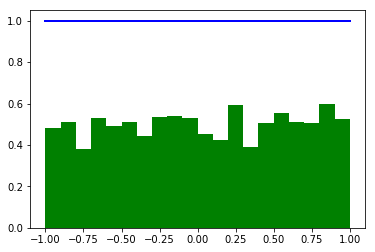

In [55]:
# Display histogram of the samples, along with their ptrobability density 
# function

import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(sample, 20, normed = True, color = 'g')
plt.plot(bins, np.ones_like(bins), linewidth = 2, color = 'b')

plt.show()

In [73]:
#Guassian or Normal Distribution
mu, sigma, size = 0, 0.1, 500 #Where mu is mean and sigma os standard deviation)

np.random.normal(mu, sigma) #provides a random data point in the distribution described
sample = np.random.normal(mu, sigma, size) #provides array of values in the dist. given the sample size

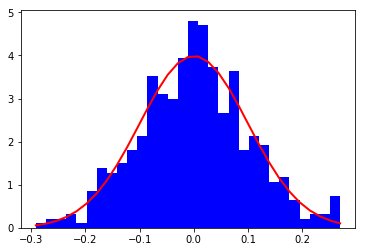

In [71]:
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(sample, 30, normed = True, color = 'b')
plt.plot(bins, 
             1/(sigma * np.sqrt(2*np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2)),
             linewidth = 2, color = 'r')

plt.show()

In [80]:
#Given a mean of a normal distribution and size find the standard deviation
distribution = np.random.normal(0.75, size =1000)

np.std(distribution)

array([  1.39025216e+00,   7.01447048e-01,   1.06223095e+00,
        -1.33258949e+00,   2.21487651e-01,   6.65502435e-01,
         1.82382196e+00,   1.33412745e+00,  -6.39093806e-01,
         1.67690385e+00,   3.55188074e-01,   1.73108451e+00,
         4.42474326e-01,   4.73911356e-01,   2.38588902e+00,
         2.95007740e-01,   4.70478670e-01,   6.11913604e-03,
         1.00576877e-01,   3.28943173e+00,   2.38596466e+00,
         1.46922195e+00,   1.10469785e+00,   1.67983958e-02,
         5.89950057e-01,   1.12324184e-01,   9.86673535e-01,
         1.41085455e+00,   1.05757145e+00,  -2.38930190e-01,
         2.26554915e+00,   5.32448274e-01,  -7.97382726e-01,
         1.28210160e-01,   1.45392664e+00,   1.38292746e+00,
         4.74701676e-01,   1.45760623e+00,   2.53409735e+00,
         1.45490447e+00,  -1.47065786e+00,  -1.33600723e-02,
         6.36042272e-01,   1.87152505e+00,   9.79439331e-01,
         9.18672104e-01,   1.48574590e+00,   2.96589517e-02,
         1.89893875e+00,

# Dict Hash Table

In [84]:
dict = {}
dict['a'] = 'alpha'
dict['g'] = 'gamma'
dict['o'] = 'omega'

print (dict['a'])

dict['a'] = [1, 2, 3] #replaces alpha with [1,2,3]

dict.get('g')

alpha


'gamma'

In [85]:
for key in dict: print(key)

a
g
o


In [86]:
for key in dict.keys(): print (key)

a
g
o


In [87]:
print (dict.keys())

dict_keys(['a', 'g', 'o'])


In [88]:
dict.values()

dict_values([[1, 2, 3], 'gamma', 'omega'])

In [93]:
# loop over the keys in sorted order, accessing each key/value
for key in sorted(dict.keys()):
        print (key, dict[key])

a [1, 2, 3]
g gamma
o omega


In [95]:
print (dict.items())

dict_items([('a', [1, 2, 3]), ('g', 'gamma'), ('o', 'omega')])


In [97]:
for k, v in dict.items(): print (k , '->', v)

a -> [1, 2, 3]
g -> gamma
o -> omega


In [99]:
hash = {
    'word': 'garfield',
    'count': 42
}
s = 'I want {} copies of {}'.format(hash['count'], hash['word'])
s

'I want 42 copies of garfield'

In [100]:
del hash['word']
hash

{'count': 42}

# Files (Standard Python)

In [103]:
#Echo the contents of a file
#'rU' is the Universal mode for text files
#'utf-8' can be used if it's having probems reading.


f = open('olympics.csv')  
for line in f:
    print (line,)
    
f.close()

,#summer,gold,silver,bronze,Total,#winter,gold.1,silver.1,bronze.1,Total.1,#games,gold.2,silver.2,bronze.2,Total.2

Afghanistan,14,0,0,2,2,0,0,0,0,0,14,0,0,2,2

Algeria,13,5,4,8,17,3,0,0,0,0,16,5,4,8,17

Argentina,24,21,25,28,74,18,0,0,0,0,42,21,25,28,74

Armenia,6,2,5,7,14,6,0,0,0,0,12,2,5,7,14

Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12

Australia,26,147,163,187,497,18,5,3,4,12,44,152,166,191,509

Austria,27,18,33,36,87,22,59,78,81,218,49,77,111,117,305

Azerbaijan,6,7,11,25,43,5,0,0,0,0,11,7,11,25,43

Bahamas,16,6,2,6,14,0,0,0,0,0,16,6,2,6,14

Bahrain,9,1,1,1,3,0,0,0,0,0,9,1,1,1,3

Barbados,12,0,0,1,1,0,0,0,0,0,12,0,0,1,1

Belarus,6,12,27,38,77,6,6,4,5,15,12,18,31,43,92

Belgium,26,40,53,55,148,20,1,1,3,5,46,41,54,58,153

Bermuda,18,0,0,1,1,7,0,0,0,0,25,0,0,1,1

Bohemia,3,0,1,3,4,0,0,0,0,0,3,0,1,3,4

Botswana,10,0,1,0,1,0,0,0,0,0,10,0,1,0,1

Brazil,22,30,36,63,129,7,0,0,0,0,29,30,36,63,129

British West Indies,1,0,0,2,2,0,0,0,0,0,1,0,0,2,2

Bulgaria,20,51,86,80,217,19,1,2,3,6,39,52